# Business Problem

The business problem for this project is to develop a predictive model that can accurately predict a player's rank in Starcraft using the provided dataset. By leveraging the information available in the dataset, we aim to create a model that can assist in assessing a player's performance and rank, providing valuable insights to stakeholders.

# Analysis Performed

1. ETL:

- The necessary libraries for analysis are imported, including numpy, pandas, matplotlib, seaborn, and various models from scikit-learn and Keras.
- The dataset is loaded into a pandas DataFrame.
- Duplicates in the DataFrame are checked for and handled if found.
- Numeric columns are converted to their appropriate data types (integer and float) using pandas' to_numeric method.
- Missing values in specific columns are imputed or filtered based on the given criteria.

2. EDA:

- Scatter plots are created to visualize the relationships between different variables and the target variable (LeagueIndex).
- Grouped bar plots are generated to observe the mean values of different features across different LeagueIndices.

3. Modeling:

- The DataFrame is preprocessed by separating the features (X) and the target variable (y).
- Missing values are imputed using the mean strategy, and the features are standardized using scikit-learn's SimpleImputer and StandardScaler.
- The data is split into training and testing sets using scikit-learn's train_test_split function.
- Several machine learning models are trained and evaluated:
- - Logistic Regression: The model is created, fitted to the training data, and used to make predictions. Accuracy, mean squared error (MSE), and classification report are calculated and printed.
- - Support Vector Machine (SVM): The model is created, fitted, and used to make predictions. Feature importances are calculated using permutation importance. Accuracy, MSE, and predictions are evaluated and printed.
- - Ordinal Regression: The model is created, fitted, and used to make predictions. Feature importances are calculated using permutation importance. Accuracy, MSE, and predictions are evaluated and printed.
- - Gradient Boosting: The model is created, fitted, and used to make predictions. Feature importances are retrieved. Accuracy, MSE, and predictions are evaluated and printed.
- - Random Forest: The model is created, fitted, and used to make predictions. Accuracy, MSE, and predictions are evaluated and printed.
- - Neural Network (Keras): The model architecture is defined, compiled, and trained. Accuracy, MSE, and feature importances (calculated using permutation importances) are evaluated and printed.

4. Evaluation:

- A function is defined to evaluate a given model by calculating accuracy, MSE, and classification report on the testing set. The function also predicts the target variable for new data.
- Each model is evaluated using this function, and the evaluation results are printed.
- Overall, the project involves loading and preprocessing the dataset, exploring the data through visualizations, training multiple models, and evaluating their performance. The goal is to develop a predictive model that accurately predicts a player's rank in Starcraft.

Overall, the project involves loading and preprocessing the dataset, exploring the data through visualizations, training multiple models, and evaluating their performance. The goal is to develop a predictive model that accurately predicts a player's rank in Starcraft.

In [46]:
#Importing necessary libraries for analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import autosklearn.regression
import autosklearn.metrics
from sklearn.metrics import mean_squared_error
from sklearn.inspection import permutation_importance
from keras.models import Sequential
from keras.layers import Dense
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier
from mord import LogisticAT
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.impute import SimpleImputer

In [47]:
df = pd.read_csv("starcraft_player_data.csv")

In [48]:
df.head()

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
0,52,5,27,10,3000,143.7180,0.003515,0.000220,7,0.000110,0.000392,0.004849,32.6677,40.8673,4.7508,28,0.001397,6,0.0,0.000000
1,55,5,23,10,5000,129.2322,0.003304,0.000259,4,0.000294,0.000432,0.004307,32.9194,42.3454,4.8434,22,0.001193,5,0.0,0.000208
2,56,4,30,10,200,69.9612,0.001101,0.000336,4,0.000294,0.000461,0.002926,44.6475,75.3548,4.0430,22,0.000745,6,0.0,0.000189
3,57,3,19,20,400,107.6016,0.001034,0.000213,1,0.000053,0.000543,0.003783,29.2203,53.7352,4.9155,19,0.000426,7,0.0,0.000384
4,58,3,32,10,500,122.8908,0.001136,0.000327,2,0.000000,0.001329,0.002368,22.6885,62.0813,9.3740,15,0.001174,4,0.0,0.000019


In [49]:
# Check the data types of each column
print(df.dtypes)

# Check for missing values
print(df.isnull().sum())

GameID                    int64
LeagueIndex               int64
Age                      object
HoursPerWeek             object
TotalHours               object
APM                     float64
SelectByHotkeys         float64
AssignToHotkeys         float64
UniqueHotkeys             int64
MinimapAttacks          float64
MinimapRightClicks      float64
NumberOfPACs            float64
GapBetweenPACs          float64
ActionLatency           float64
ActionsInPAC            float64
TotalMapExplored          int64
WorkersMade             float64
UniqueUnitsMade           int64
ComplexUnitsMade        float64
ComplexAbilitiesUsed    float64
dtype: object
GameID                  0
LeagueIndex             0
Age                     0
HoursPerWeek            0
TotalHours              0
APM                     0
SelectByHotkeys         0
AssignToHotkeys         0
UniqueHotkeys           0
MinimapAttacks          0
MinimapRightClicks      0
NumberOfPACs            0
GapBetweenPACs          0
ActionLa

In [50]:
# Assuming your DataFrame is named 'df'
duplicates = df.duplicated()

if duplicates.any():
    print("Duplicates found in the DataFrame.")
    # To see the duplicated rows, you can use:
    # duplicated_rows = df[duplicates]
else:
    print("No duplicates found in the DataFrame.")

No duplicates found in the DataFrame.


In [51]:
# Replace non-numeric values with NaN
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df['HoursPerWeek'] = pd.to_numeric(df['HoursPerWeek'], errors='coerce')
df['TotalHours'] = pd.to_numeric(df['TotalHours'], errors='coerce')

# Convert Age, HoursPerWeek, and TotalHours to integer
df['Age'] = df['Age'].astype('Int64')
df['HoursPerWeek'] = df['HoursPerWeek'].astype('Int64')
df['TotalHours'] = df['TotalHours'].astype('Int64')

# Convert TotalMapExplored to float
df['TotalMapExplored'] = df['TotalMapExplored'].astype(float)

In [52]:
# Check the data types of each column
print(df.dtypes)

# Check for missing values
print(df.isnull().sum())

GameID                    int64
LeagueIndex               int64
Age                       Int64
HoursPerWeek              Int64
TotalHours                Int64
APM                     float64
SelectByHotkeys         float64
AssignToHotkeys         float64
UniqueHotkeys             int64
MinimapAttacks          float64
MinimapRightClicks      float64
NumberOfPACs            float64
GapBetweenPACs          float64
ActionLatency           float64
ActionsInPAC            float64
TotalMapExplored        float64
WorkersMade             float64
UniqueUnitsMade           int64
ComplexUnitsMade        float64
ComplexAbilitiesUsed    float64
dtype: object
GameID                   0
LeagueIndex              0
Age                     55
HoursPerWeek            56
TotalHours              57
APM                      0
SelectByHotkeys          0
AssignToHotkeys          0
UniqueHotkeys            0
MinimapAttacks           0
MinimapRightClicks       0
NumberOfPACs             0
GapBetweenPACs        

In [53]:
#identify which LeaugeIndex had the null values
filtered_df1 = df[(df['LeagueIndex'] == 8) & (df['Age'].notnull())]
print(filtered_df1)

Empty DataFrame
Columns: [GameID, LeagueIndex, Age, HoursPerWeek, TotalHours, APM, SelectByHotkeys, AssignToHotkeys, UniqueHotkeys, MinimapAttacks, MinimapRightClicks, NumberOfPACs, GapBetweenPACs, ActionLatency, ActionsInPAC, TotalMapExplored, WorkersMade, UniqueUnitsMade, ComplexUnitsMade, ComplexAbilitiesUsed]
Index: []


In [54]:
# Finding rows with missing data in column 'A'
mask = df['TotalHours'].isna()
rows_with_missing_data = df.loc[mask]

# Accessing values of other columns for the selected rows
other_columns_values = rows_with_missing_data[['LeagueIndex', 'APM']]

print(other_columns_values.head())

      LeagueIndex       APM
358             5   94.4724
1841            5  122.2470
3340            8  189.7404
3341            8  287.8128
3342            8  294.0996


In [55]:
# Filter out rows with LeagueIndex = 5 and TotalTime as NaN
filtered_df = df[(df['LeagueIndex'] != 5) | df['TotalHours'].notna()]

filtered_df

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
0,52,5,27,10,3000,143.7180,0.003515,0.000220,7,0.000110,0.000392,0.004849,32.6677,40.8673,4.7508,28.0,0.001397,6,0.000000,0.000000
1,55,5,23,10,5000,129.2322,0.003304,0.000259,4,0.000294,0.000432,0.004307,32.9194,42.3454,4.8434,22.0,0.001193,5,0.000000,0.000208
2,56,4,30,10,200,69.9612,0.001101,0.000336,4,0.000294,0.000461,0.002926,44.6475,75.3548,4.0430,22.0,0.000745,6,0.000000,0.000189
3,57,3,19,20,400,107.6016,0.001034,0.000213,1,0.000053,0.000543,0.003783,29.2203,53.7352,4.9155,19.0,0.000426,7,0.000000,0.000384
4,58,3,32,10,500,122.8908,0.001136,0.000327,2,0.000000,0.001329,0.002368,22.6885,62.0813,9.3740,15.0,0.001174,4,0.000000,0.000019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3390,10089,8,<NA>,<NA>,<NA>,259.6296,0.020425,0.000743,9,0.000621,0.000146,0.004555,18.6059,42.8342,6.2754,46.0,0.000877,5,0.000000,0.000000
3391,10090,8,<NA>,<NA>,<NA>,314.6700,0.028043,0.001157,10,0.000246,0.001083,0.004259,14.3023,36.1156,7.1965,16.0,0.000788,4,0.000000,0.000000
3392,10092,8,<NA>,<NA>,<NA>,299.4282,0.028341,0.000860,7,0.000338,0.000169,0.004439,12.4028,39.5156,6.3979,19.0,0.001260,4,0.000000,0.000000
3393,10094,8,<NA>,<NA>,<NA>,375.8664,0.036436,0.000594,5,0.000204,0.000780,0.004346,11.6910,34.8547,7.9615,15.0,0.000613,6,0.000000,0.000631


In [56]:
# Finding rows with missing data in column 'A'
mask = filtered_df['TotalHours'].isna()
rows_with_missing_data = filtered_df.loc[mask]

# Accessing values of other columns for the selected rows
other_columns_values = rows_with_missing_data[['LeagueIndex', 'APM']]

print(other_columns_values.head())

# Check for missing values
print(filtered_df.isnull().sum())

      LeagueIndex       APM
3340            8  189.7404
3341            8  287.8128
3342            8  294.0996
3343            8  274.2552
3344            8  274.3404
GameID                   0
LeagueIndex              0
Age                     55
HoursPerWeek            55
TotalHours              55
APM                      0
SelectByHotkeys          0
AssignToHotkeys          0
UniqueHotkeys            0
MinimapAttacks           0
MinimapRightClicks       0
NumberOfPACs             0
GapBetweenPACs           0
ActionLatency            0
ActionsInPAC             0
TotalMapExplored         0
WorkersMade              0
UniqueUnitsMade          0
ComplexUnitsMade         0
ComplexAbilitiesUsed     0
dtype: int64


In [57]:
filtered_df.describe()

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
count,3393.000000,3393.000000,3338.0,3338.0,3338.0,3393.000000,3393.000000,3393.000000,3393.000000,3393.000000,3393.000000,3393.000000,3393.000000,3393.000000,3393.000000,3393.000000,3393.000000,3393.000000,3393.000000,3393.000000
mean,4805.982317,4.183613,21.650389,15.909527,960.421809,117.052068,0.004298,0.000373,4.365458,0.000098,0.000388,0.003463,40.361351,63.742426,5.273598,22.128795,0.001032,6.534335,0.000059,0.000142
std,2719.977115,1.517645,4.206357,11.964495,17318.133922,51.959080,0.005286,0.000225,2.360796,0.000166,0.000377,0.000992,17.156965,19.243929,1.494808,7.432335,0.000519,1.858040,0.000111,0.000265
min,52.000000,1.000000,16.0,0.0,3.0,22.059600,0.000000,0.000000,0.000000,0.000000,0.000000,0.000679,6.666700,24.093600,2.038900,5.000000,0.000077,2.000000,0.000000,0.000000
25%,2465.000000,3.000000,19.0,8.0,300.0,79.827000,0.001258,0.000204,3.000000,0.000000,0.000140,0.002753,28.950000,50.439000,4.273400,17.000000,0.000683,5.000000,0.000000,0.000000
50%,4874.000000,4.000000,21.0,12.0,500.0,108.010200,0.002497,0.000352,4.000000,0.000040,0.000282,0.003395,36.723500,60.931800,5.095500,22.000000,0.000905,6.000000,0.000000,0.000020
75%,7110.000000,5.000000,24.0,20.0,800.0,142.791600,0.005131,0.000499,6.000000,0.000119,0.000514,0.004026,48.290400,73.698300,6.033900,27.000000,0.001259,8.000000,0.000085,0.000181
max,10095.000000,8.000000,44.0,168.0,1000000.0,389.831400,0.043088,0.001752,10.000000,0.003019,0.004041,0.007971,237.142900,176.372100,18.558100,58.000000,0.005149,13.000000,0.000902,0.003084


In [58]:
# Calculate the 98th percentile cutoff of the 'TotalHours' column
cutoff = filtered_df['TotalHours'].quantile(0.97)

# Fill missing values for LeagueIndex = 8
filtered_df.loc[filtered_df['LeagueIndex'] == 8, 'TotalHours'] = filtered_df.loc[filtered_df['LeagueIndex'] == 8, 'TotalHours'].fillna(round(cutoff))
filtered_df.loc[filtered_df['LeagueIndex'] == 8, 'HoursPerWeek'] = filtered_df.loc[filtered_df['LeagueIndex'] == 8, 'HoursPerWeek'].fillna(48)
filtered_df.loc[filtered_df['LeagueIndex'] == 8, 'Age'] = filtered_df.loc[filtered_df['LeagueIndex'] == 8, 'Age'].fillna(25)

## Justification:
Considering the average practice time of professional players, which is typically 8 hours a day for 6 days a week, I set the mean value at 48 hours for a pro player. While a typical 9-5 job lasts 40 hours a week, professional players have the flexibility to play games on weekends, potentially allowing for higher weekly hours.

Age: For the analysis, a sample of well-known pro players was used, including Reynor (20), Clem (21), Serral (25), Maru (25), Elazer (25), HeroMarine (25), Dark (28), and Scarlett (29). The median age of this sample is 25.

Source: https://www.masterycoding.com/blog/life-of-professional-esports-player#:~:text=For%20nearly%208%20hours%20each,%2C%20running%20drills%2C%20and%20streaming.

## In addition, it's worth noting that removing these rows would have resulted in the loss of valuable data that contributed to the insights gained from the analysis.

In [59]:
# Check for missing values
print(filtered_df.isnull().sum())

GameID                  0
LeagueIndex             0
Age                     0
HoursPerWeek            0
TotalHours              0
APM                     0
SelectByHotkeys         0
AssignToHotkeys         0
UniqueHotkeys           0
MinimapAttacks          0
MinimapRightClicks      0
NumberOfPACs            0
GapBetweenPACs          0
ActionLatency           0
ActionsInPAC            0
TotalMapExplored        0
WorkersMade             0
UniqueUnitsMade         0
ComplexUnitsMade        0
ComplexAbilitiesUsed    0
dtype: int64


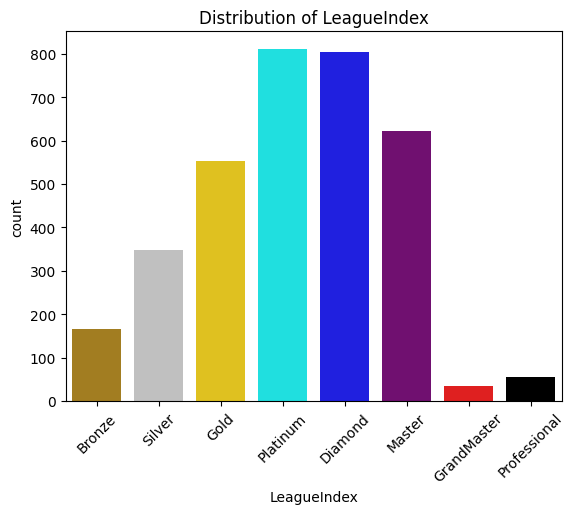

In [60]:
# Define the league_labels dictionary
league_labels = {
    1: 'Bronze',
    2: 'Silver',
    3: 'Gold',
    4: 'Platinum',
    5: 'Diamond',
    6: 'Master',
    7: 'GrandMaster',
    8: 'Professional'
}

# Define the colors for each league
colors = ['darkgoldenrod', 'silver', 'gold', 'cyan', 'blue', 'purple', 'red', 'black']

# Visualize the distribution of the target variable (LeagueIndex)
sns.countplot(x='LeagueIndex', data=filtered_df, palette=colors)
plt.title('Distribution of LeagueIndex')
plt.xticks(ticks=np.arange(8), labels=[league_labels[i] for i in range(1, 9)], rotation=45)  # Set custom x-axis labels and rotate them
plt.show()


In [61]:
def scatter_plot(data_frame, x_column, y_column, x_label, y_label):
    plt.scatter(data_frame[x_column], data_frame[y_column])
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()

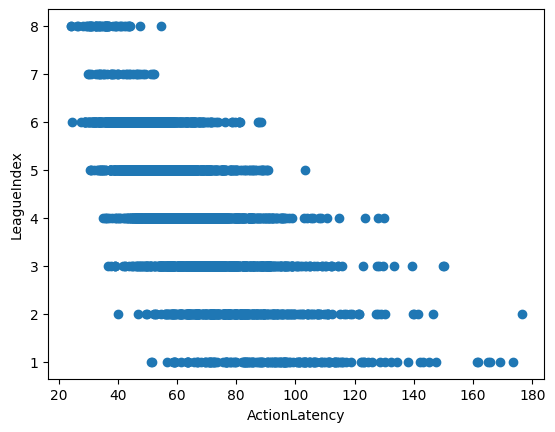

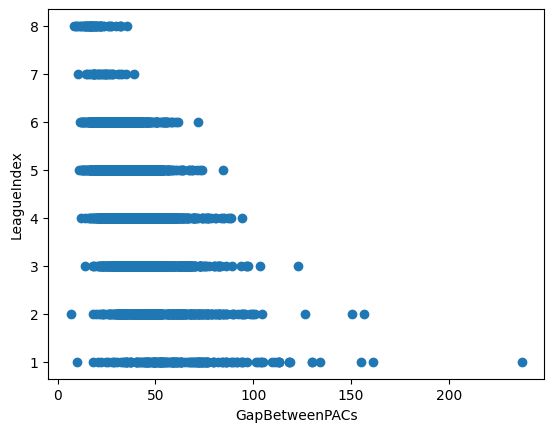

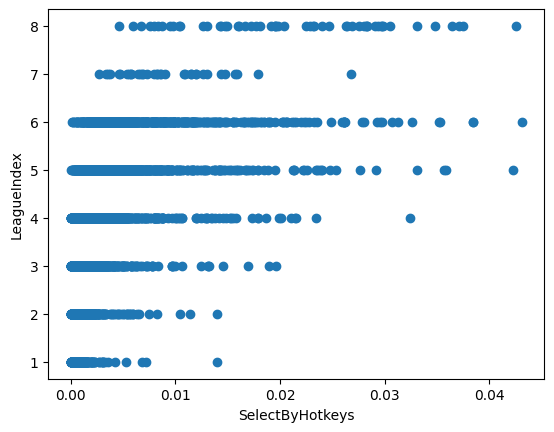

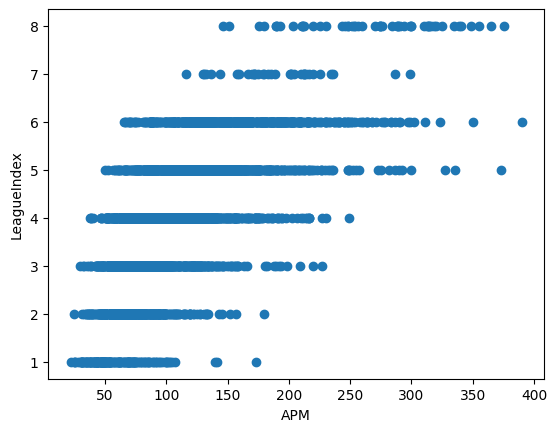

In [62]:
scatter_plot(filtered_df, 'ActionLatency', 'LeagueIndex', 'ActionLatency', 'LeagueIndex')
scatter_plot(filtered_df, 'GapBetweenPACs', 'LeagueIndex', 'GapBetweenPACs', 'LeagueIndex')
scatter_plot(filtered_df, 'SelectByHotkeys', 'LeagueIndex', 'SelectByHotkeys', 'LeagueIndex')
scatter_plot(filtered_df, 'APM', 'LeagueIndex', 'APM', 'LeagueIndex')

The scatter plots above are logically sound, requiring no changes. A player with high Action latency (180) can be ranked in Silver, indicating their superior game knowledge or builds compared to players in Bronze.

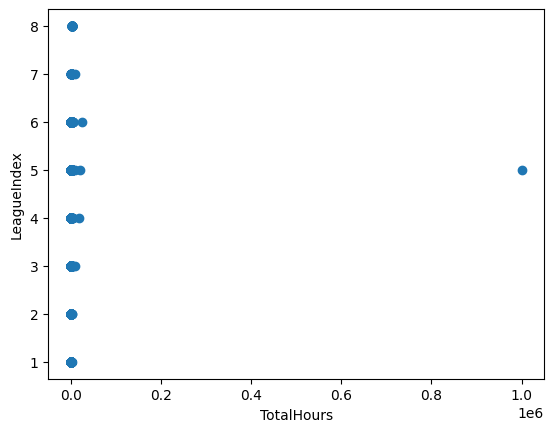

In [63]:
# Scatter plot: TotalHours vs LeagueIndex
scatter_plot(filtered_df, 'TotalHours', 'LeagueIndex', 'TotalHours', 'LeagueIndex')

In [64]:
min_hours = filtered_df['TotalHours'].min()
max_hours = filtered_df['TotalHours'].max()
print(min_hours)
print(max_hours)

3
1000000


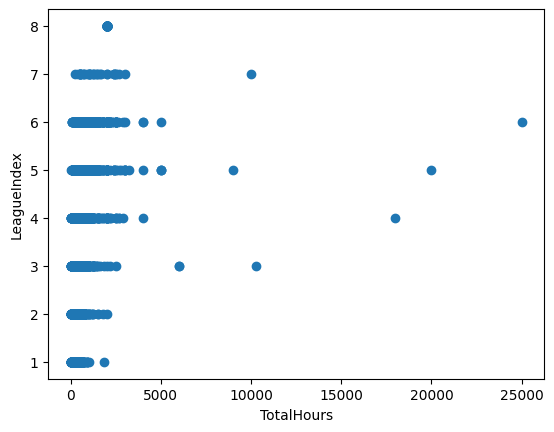

In [65]:
##Both methods work, but I decided to just filter out the one data point

# # Calculate mean and standard deviation for TotalHours column
# mean = filtered_df['TotalHours'].mean()
# std = filtered_df['TotalHours'].std()

# # Calculate Z-scores manually
# z_scores = (filtered_df['TotalHours'] - mean) / std

# # Define a threshold (e.g., Z-score > 3 or Z-score < -3) to identify outliers
# threshold = 3

# # Filter out rows with TotalHours Z-scores beyond the threshold
# filtered_df = filtered_df[abs(z_scores) <= threshold]

# Remove the data point with TotalHours = 1000000
filtered_df = filtered_df[filtered_df['TotalHours'] != 1000000]


# Scatter plot: TotalHours vs LeagueIndex
scatter_plot(filtered_df, 'TotalHours', 'LeagueIndex', 'TotalHours', 'LeagueIndex')

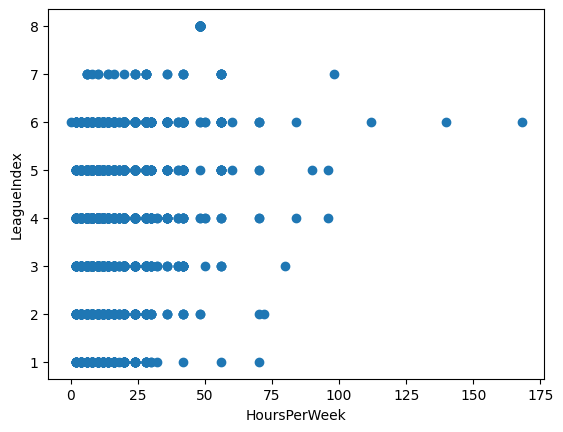

In [66]:
scatter_plot(filtered_df, 'HoursPerWeek', 'LeagueIndex', 'HoursPerWeek', 'LeagueIndex')

### Removing the outlier of 168 hours, as playing every hour for the entire week is impossible.

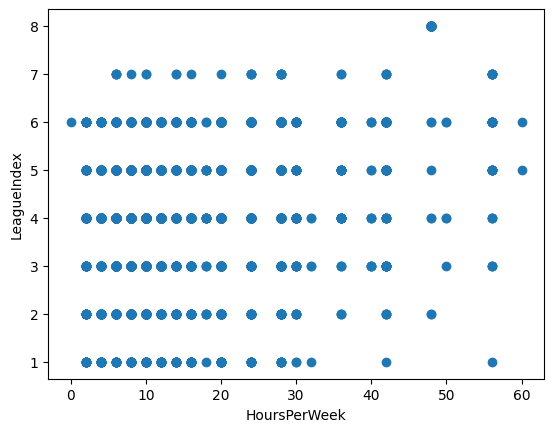

In [67]:
# Calculate mean and standard deviation for TotalHours column
mean = filtered_df['HoursPerWeek'].mean()
std = filtered_df['HoursPerWeek'].std()

# Calculate Z-scores manually
z_scores = (filtered_df['HoursPerWeek'] - mean) / std

# Define a threshold (e.g., Z-score > 4 or Z-score < -4) to identify outliers
threshold = 4

# Filter out rows with TotalHours Z-scores beyond the threshold
filtered_df = filtered_df[abs(z_scores) <= threshold]

scatter_plot(filtered_df, 'HoursPerWeek', 'LeagueIndex', 'HoursPerWeek', 'LeagueIndex')

 ## Justification:
It is conceivable for a dedicated player to spend 60 hours a week playing. However, it should be noted that there were several outliers in the dataset, and to ensure data integrity, a cutoff at 60 hours per week was applied during the filtering process. The scatter plots above provide supporting evidence for this scenario.

In [68]:
filtered_df.describe()

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
count,3372.000000,3372.000000,3372.0,3372.0,3372.0,3372.000000,3372.000000,3372.000000,3372.000000,3372.000000,3372.000000,3372.000000,3372.000000,3372.000000,3372.000000,3372.000000,3372.000000,3372.000000,3372.000000,3372.000000
mean,4811.499110,4.180605,21.716489,16.005931,679.728351,116.840559,0.004274,0.000373,4.362100,0.000098,0.000388,0.003460,40.396491,63.781266,5.273011,22.115065,0.001032,6.531435,0.000059,0.000141
std,2721.768692,1.516938,4.188136,11.142824,865.665381,51.759337,0.005252,0.000224,2.356211,0.000166,0.000377,0.000990,17.186707,19.220243,1.496223,7.414845,0.000520,1.855318,0.000111,0.000264
min,52.000000,1.000000,16.0,0.0,3.0,22.059600,0.000000,0.000000,0.000000,0.000000,0.000000,0.000679,6.666700,24.093600,2.038900,5.000000,0.000077,2.000000,0.000000,0.000000
25%,2468.000000,3.000000,19.0,8.0,300.0,79.685400,0.001257,0.000204,3.000000,0.000000,0.000140,0.002753,28.966850,50.467750,4.273125,17.000000,0.000683,5.000000,0.000000,0.000000
50%,4899.000000,4.000000,21.0,12.0,500.0,107.981100,0.002486,0.000352,4.000000,0.000040,0.000282,0.003394,36.790050,60.984100,5.094000,22.000000,0.000905,6.000000,0.000000,0.000020
75%,7119.250000,5.000000,24.0,20.0,800.0,142.474500,0.005091,0.000498,6.000000,0.000118,0.000514,0.004022,48.308000,73.760625,6.034100,27.000000,0.001259,8.000000,0.000085,0.000180
max,10095.000000,8.000000,44.0,60.0,25000.0,389.831400,0.043088,0.001752,10.000000,0.003019,0.004041,0.007971,237.142900,176.372100,18.558100,58.000000,0.005149,13.000000,0.000902,0.003084


In [69]:
# scatter_plot(filtered_df, 'Age', 'LeagueIndex', 'Age', 'LeagueIndex')
# scatter_plot(filtered_df, 'HoursPerWeek', 'LeagueIndex', 'HoursPerWeek', 'LeagueIndex')
# scatter_plot(filtered_df, 'TotalHours', 'LeagueIndex', 'TotalHours', 'LeagueIndex')
# scatter_plot(filtered_df, 'APM', 'LeagueIndex', 'APM', 'LeagueIndex')
# scatter_plot(filtered_df, 'SelectByHotkeys', 'LeagueIndex', 'SelectByHotkeys', 'LeagueIndex')
# scatter_plot(filtered_df, 'AssignToHotkeys', 'LeagueIndex', 'AssignToHotkeys', 'LeagueIndex')
# scatter_plot(filtered_df, 'UniqueHotkeys', 'LeagueIndex', 'UniqueHotkeys', 'LeagueIndex')
# scatter_plot(filtered_df, 'MinimapAttacks', 'LeagueIndex', 'MinimapAttacks', 'LeagueIndex')
# scatter_plot(filtered_df, 'MinimapRightClicks', 'LeagueIndex', 'MinimapRightClicks', 'LeagueIndex')
# scatter_plot(filtered_df, 'NumberOfPACs', 'LeagueIndex', 'NumberOfPACs', 'LeagueIndex')
# scatter_plot(filtered_df, 'GapBetweenPACs', 'LeagueIndex', 'GapBetweenPACs', 'LeagueIndex')
# scatter_plot(filtered_df, 'ActionLatency', 'LeagueIndex', 'ActionLatency', 'LeagueIndex')
# scatter_plot(filtered_df, 'ActionsInPAC', 'LeagueIndex', 'ActionsInPAC', 'LeagueIndex')
# scatter_plot(filtered_df, 'TotalMapExplored', 'LeagueIndex', 'TotalMapExplored', 'LeagueIndex')
# scatter_plot(filtered_df, 'WorkersMade', 'LeagueIndex', 'WorkersMade', 'LeagueIndex')
# scatter_plot(filtered_df, 'UniqueUnitsMade', 'LeagueIndex', 'UniqueUnitsMade', 'LeagueIndex')
# scatter_plot(filtered_df, 'ComplexUnitsMade', 'LeagueIndex', 'ComplexUnitsMade', 'LeagueIndex')
# scatter_plot(filtered_df, 'ComplexAbilitiesUsed', 'LeagueIndex', 'ComplexAbilitiesUsed', 'LeagueIndex')

Everything appears normal.

In [70]:
def plot_grouped_data(data_frame, group_column, value_column, labels, colors, title, x_label, y_label):
    # Group the data and calculate the mean
    grouped_data = data_frame.groupby(group_column)[value_column].mean()

    # Plot the grouped data with custom colors
    plt.bar(grouped_data.index, grouped_data, color=colors)

    # Add custom labels to the x-axis ticks
    plt.xticks(list(labels.keys()), list(labels.values()), rotation=45)

    # Set the x-axis label, y-axis label, and plot title
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)

    plt.show()

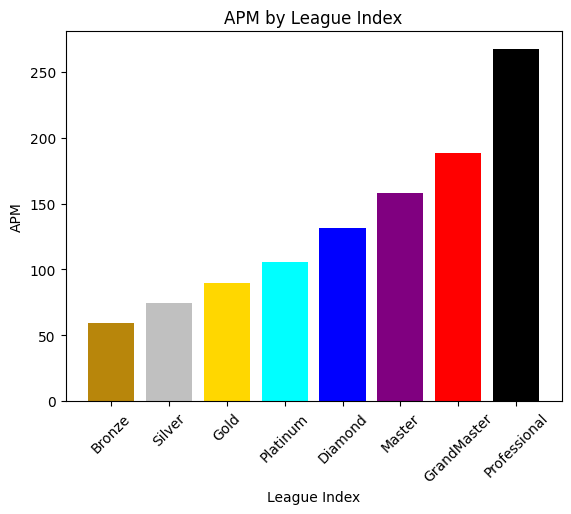

In [71]:
#Call plot grouped data function for total hours
plot_grouped_data(filtered_df, 'LeagueIndex', 'APM', league_labels, colors, 'APM by League Index', 'League Index', 'APM')

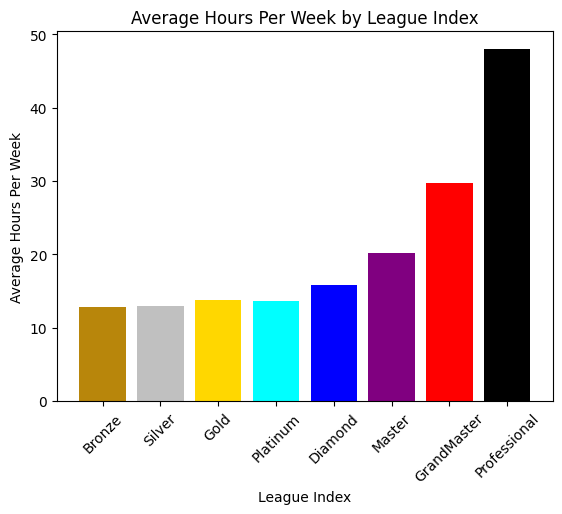

In [72]:
#Call plot grouped data function for hours per week
plot_grouped_data(filtered_df, 'LeagueIndex', 'HoursPerWeek', league_labels, colors, 'Average Hours Per Week by League Index', 'League Index', 'Average Hours Per Week')

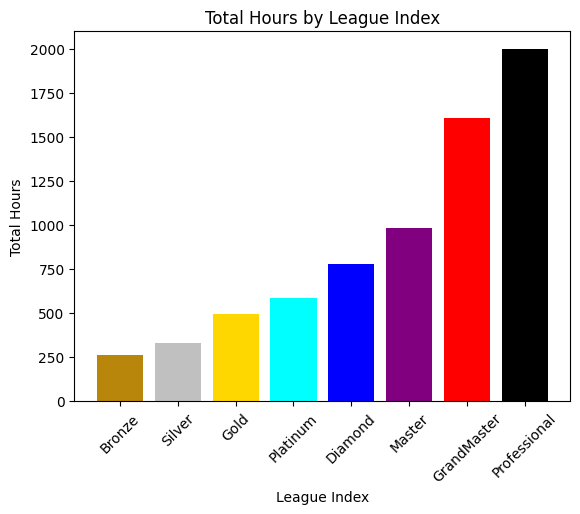

In [73]:
#Call plot grouped data function for total hours
plot_grouped_data(filtered_df, 'LeagueIndex', 'TotalHours', league_labels, colors, 'Total Hours by League Index', 'League Index', 'Total Hours')

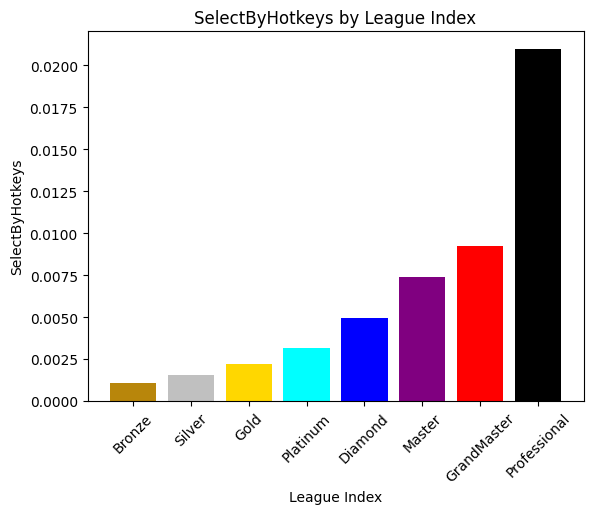

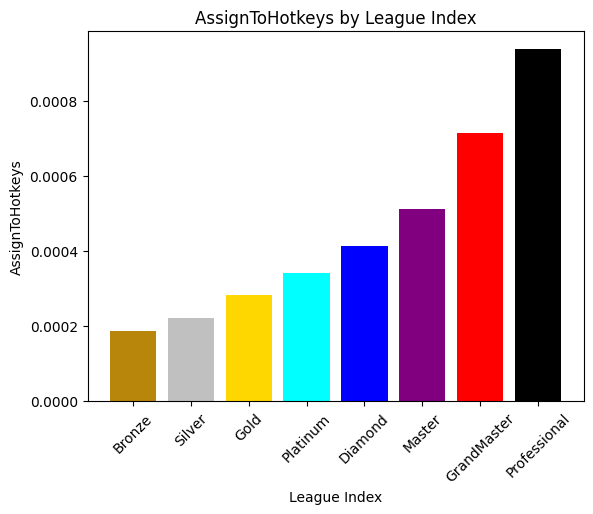

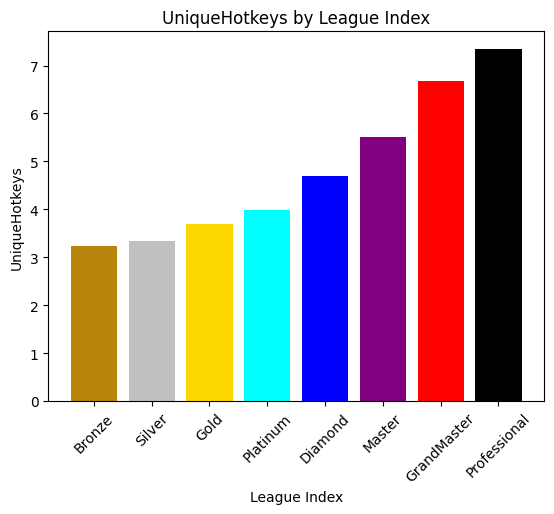

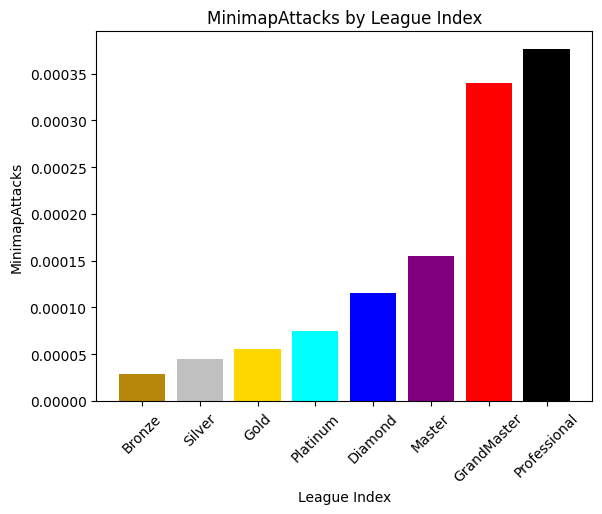

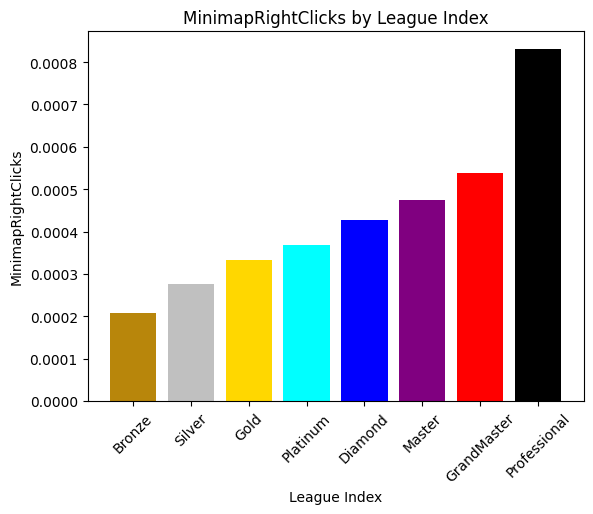

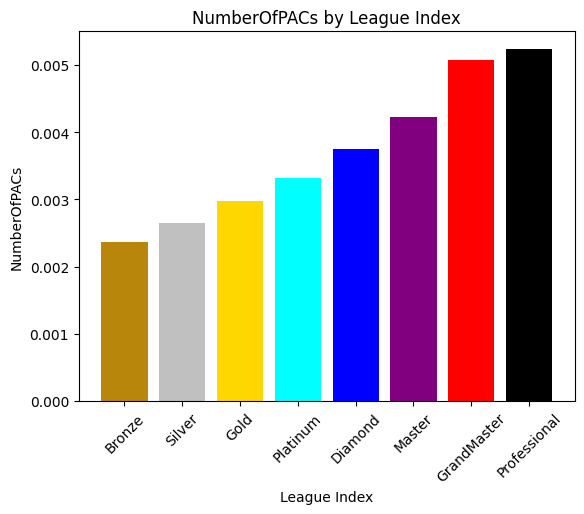

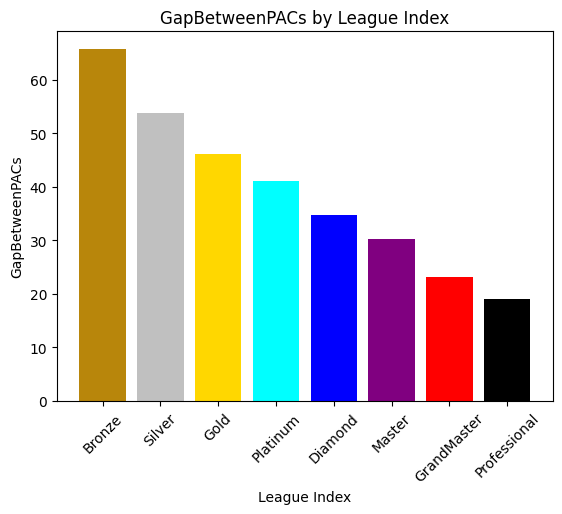

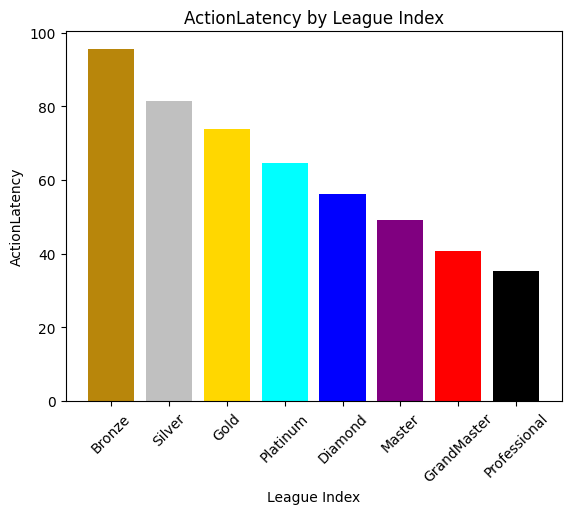

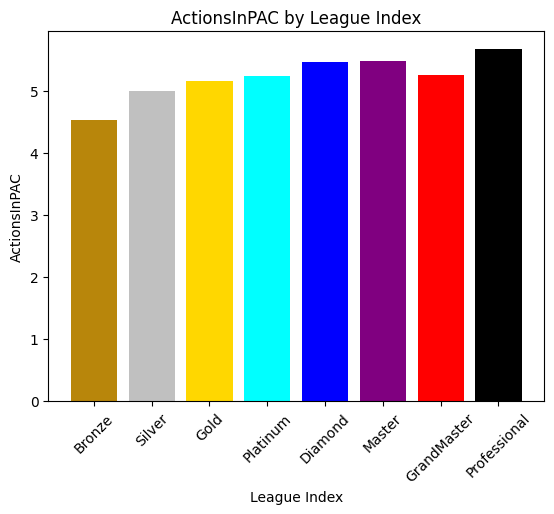

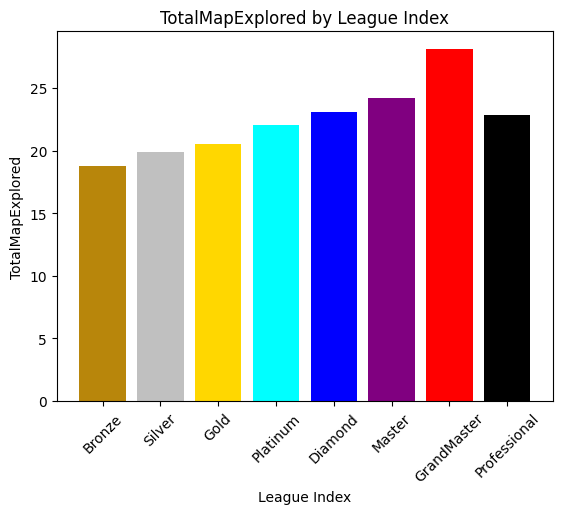

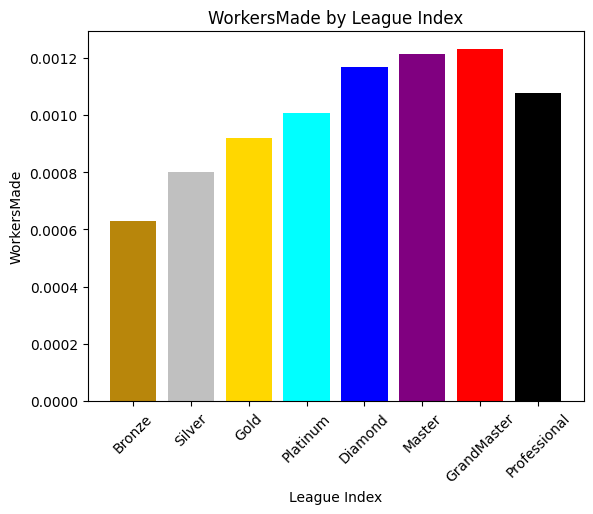

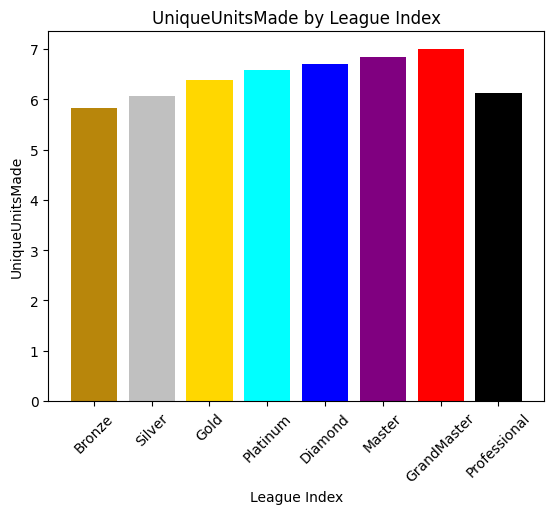

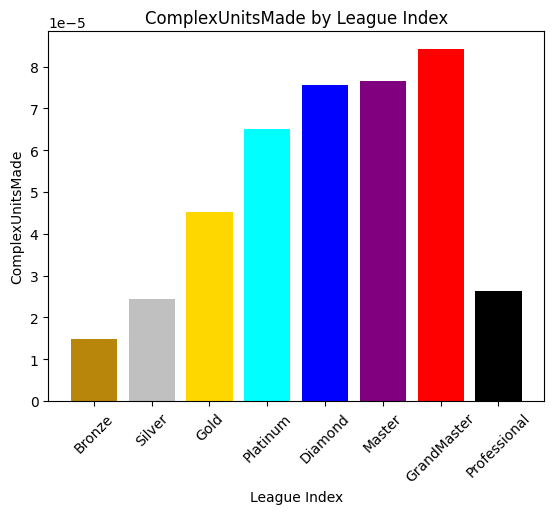

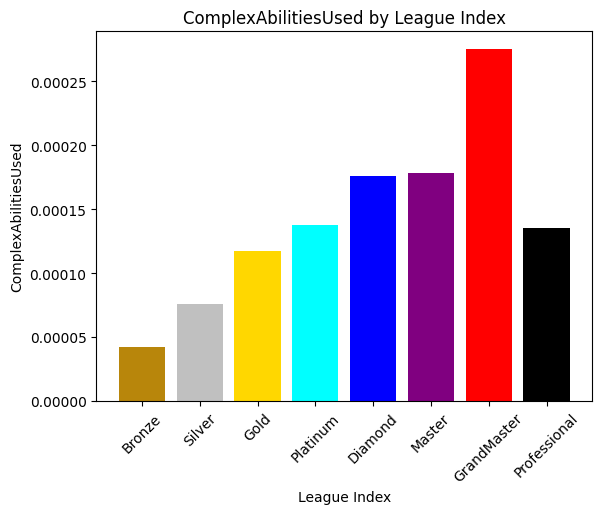

In [74]:
# Call plot_grouped_data function for each column
columns = ['SelectByHotkeys', 'AssignToHotkeys', 'UniqueHotkeys', 'MinimapAttacks', 'MinimapRightClicks',
           'NumberOfPACs', 'GapBetweenPACs', 'ActionLatency', 'ActionsInPAC', 'TotalMapExplored',
           'WorkersMade', 'UniqueUnitsMade', 'ComplexUnitsMade', 'ComplexAbilitiesUsed']

for column in columns:
    plot_grouped_data(filtered_df, 'LeagueIndex', column, league_labels, colors,
                      f'{column} by League Index', 'League Index', column)

# Hypothetical Scenario: Collecting More Data
After conducting exploratory data analysis (EDA), it is evident that professional games tend to have shorter durations compared to the rest of the player base. This can be observed from the difference in complex units made, which are typically associated with late-game strategies. The shorter game times in professional play are likely due to refined execution, the ability to capitalize on build order mistakes, and efficient use of workers and map exploration. To further investigate, gathering average game duration data is recommended.

Additionally, it is recommended to collect the last played ranked game date to ensure data relevance and alignment with the current meta. Analyzing trends among the different races (Protoss, Terran, Zerg) would provide valuable insights. Moreover, breaking down weekly hours based on various training activities, such as watching VODs, playing ranked games, practicing against easy AI for specific techniques (e.g., Elazer's creep spread), playing off-race, campaign, or arcade modes, would offer a comprehensive understanding of players' training habits and skill development. It is worth considering the longer queue times for higher-ranked players, which may lead them to use alternative accounts to find more opponents for practice.

It is worth investigating the underrepresentation of Grandmaster rank and understanding why diamond players have the highest total playtime. Collecting the date of account creation could shed light on the nature of these players (casual or committed) and their commitment to staying up to date. Additionally, considering the players' regions would enhance data relevance and potentially yield more insights.

In addition to APM (Actions Per Minute), capturing EPM (Effective Actions Per Minute) would be valuable. While they may be correlated, EPM focuses on the more meaningful actions a player performs during a game, whereas APM includes all actions, including spamming selection boxes.

Exploring the breakdown of unique camera locations set per game and their frequency of use could provide insights into the impact of this mechanic on rank. Understanding the struggles players face in setting camera locations and how it relates to their performance would be insightful.

Lastly, it would be interesting to include outliers such as maphackers in the data analysis to identify their patterns in EDA. It is expected that they would exhibit lower mechanics but higher ranks, which could provide valuable insights into identifying suspicious behavior.

Overall, expanding the data collection with these suggested variables would provide a more comprehensive understanding of player dynamics, strategies, and factors influencing rank.

I would have appreciated a PAC glossary for clarity during the assessment.

In [75]:
# import ydata_profiling
# report = ydata_profiling.ProfileReport(filtered_df, title="Pandas Profiling Report")
# report

## I have created my own correlation map since the one provided by ydata_profiling has a color palette that is difficult to read. Ydata_profiling assisted me in EDA

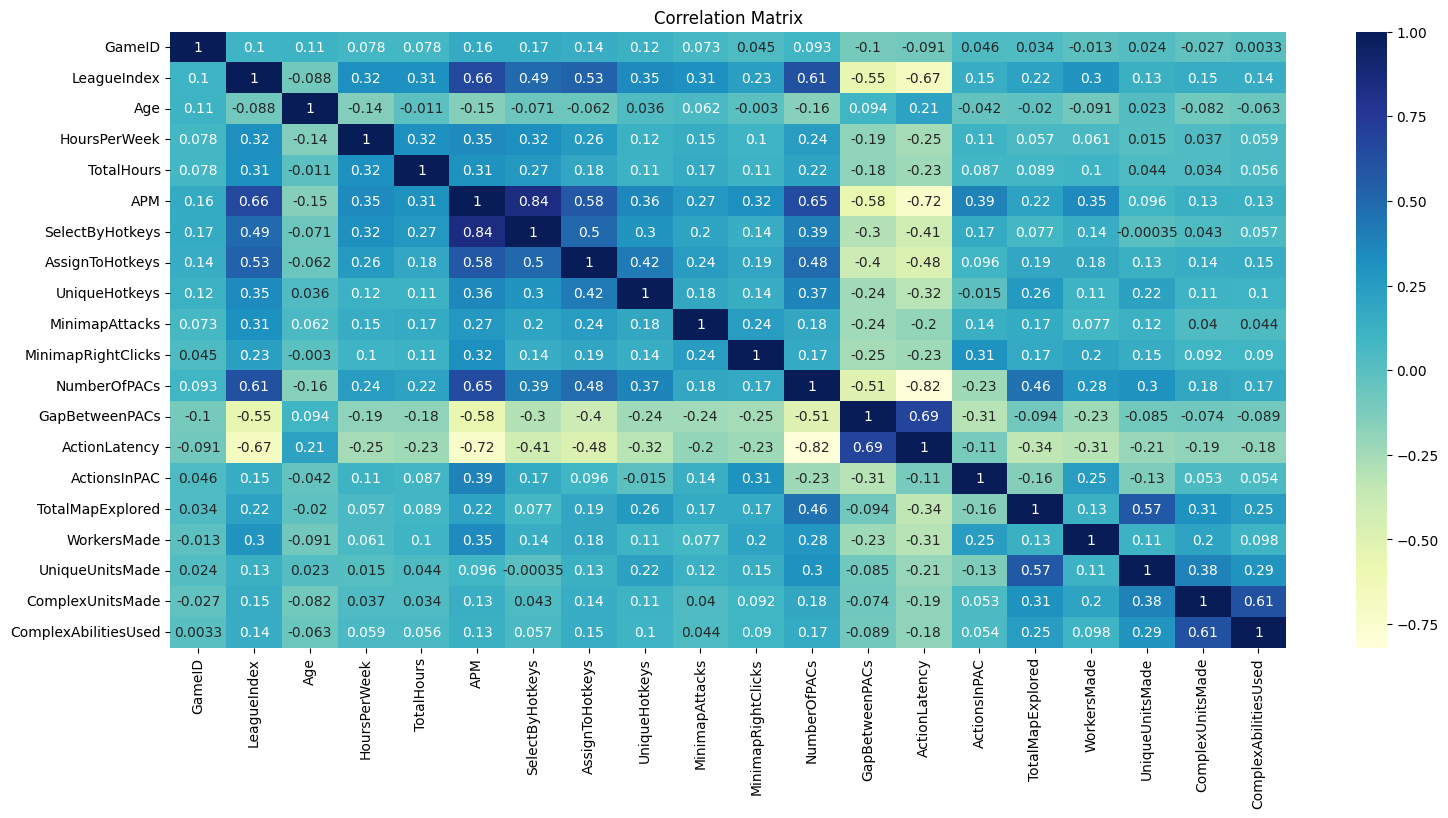

In [76]:
# Explore correlations between features
correlation_matrix = filtered_df.corr()

# Plot correlation matrix heatmap
plt.figure(figsize=(18, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu")
plt.title('Correlation Matrix')
plt.show()


In [77]:
# Create a copy of the DataFrame
df_copy = filtered_df

# Separate the features (X) and target variable (y)
X = df_copy.drop(['LeagueIndex', 'GameID'], axis=1)
y = df_copy['LeagueIndex']

# Impute missing values with the mean
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Perform standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Make predictions
new_data = pd.DataFrame({
    "Age": [25],
    "HoursPerWeek": [12],
    "TotalHours": [1500],
    "APM": [100],
    "SelectByHotkeys": [0.002],
    "AssignToHotkeys": [0.001],
    "UniqueHotkeys": [3],
    "MinimapAttacks": [0.001],
    "MinimapRightClicks": [0.001],
    "NumberOfPACs": [0.003],
    "GapBetweenPACs": [50],
    "ActionLatency": [70],
    "ActionsInPAC": [4],
    "TotalMapExplored": [30],
    "WorkersMade": [6],
    "UniqueUnitsMade": [7],
    "ComplexUnitsMade": [0],
    "ComplexAbilitiesUsed": [0.002]
})

In [78]:
def evaluate_model(model, X_test, y_test, new_data):
    # Make predictions on the testing set
    y_pred = model.predict(X_test)

    # Evaluate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)

    # Calculate MSE
    mse = mean_squared_error(y_test, y_pred)
    print("MSE:", mse)

    # Evaluate the model
    print(classification_report(y_test, y_pred, zero_division=1))

    # Predict the target variable for the new data
    predictions = model.predict(new_data)

    # Print the predictions
    print("Predictions:", predictions)

    return accuracy, mse, predictions

In [79]:
# Create and train the logistic regression model
model_lr = LogisticRegression(max_iter=1000)
model_lr.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model_lr.predict(X_test)


# Get the feature names
feature_names = X.columns

# Retrieve the feature coefficients
coefficients = model_lr.coef_[0]
abs_coefficients_lr = np.abs(coefficients)

accuracy_lr, mse_lr, predictions_lr = evaluate_model(model_lr, X_test, y_test, new_data)

Accuracy: 0.43851851851851853
MSE: 1.0192592592592593
              precision    recall  f1-score   support

           1       0.43      0.24      0.31        25
           2       0.38      0.29      0.33        73
           3       0.29      0.25      0.27        99
           4       0.41      0.46      0.43       180
           5       0.41      0.47      0.44       161
           6       0.63      0.62      0.63       124
           7       0.00      0.00      0.00         4
           8       0.82      1.00      0.90         9

    accuracy                           0.44       675
   macro avg       0.42      0.42      0.41       675
weighted avg       0.43      0.44      0.43       675

Predictions: [8]


/home/scott/.local/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [80]:
# Create the SVM model
svm_model = SVC()

# Fit the model to the training data
svm_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = svm_model.predict(X_test)

# Calculate feature importances using permutation importance
perm_importance = permutation_importance(svm_model, X_test, y_test)

# Get feature importances
feature_importance_svm = perm_importance.importances_mean

accuracy_svm, mse_svm, predictions_svm = evaluate_model(svm_model, X_test, y_test, new_data)

Accuracy: 0.41333333333333333
MSE: 1.0992592592592592
              precision    recall  f1-score   support

           1       0.14      0.04      0.06        25
           2       0.27      0.15      0.19        73
           3       0.27      0.28      0.28        99
           4       0.41      0.49      0.45       180
           5       0.40      0.47      0.43       161
           6       0.58      0.55      0.56       124
           7       1.00      0.00      0.00         4
           8       0.89      0.89      0.89         9

    accuracy                           0.41       675
   macro avg       0.50      0.36      0.36       675
weighted avg       0.41      0.41      0.40       675

Predictions: [5]


/home/scott/.local/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


In [81]:
# Create and fit the ordinal regression model
model_ord = LogisticAT()
model_ord.fit(X_train, y_train)

# Get feature importances
feature_importance_ord = perm_importance.importances_mean


accuracy_ordinal, mse_ordinal, predictions_ordinal = evaluate_model(model_ord, X_test, y_test, new_data)

Accuracy: 0.43555555555555553
MSE: 0.9896296296296296
              precision    recall  f1-score   support

           1       0.40      0.16      0.23        25
           2       0.32      0.16      0.22        73
           3       0.29      0.35      0.32        99
           4       0.44      0.53      0.48       180
           5       0.44      0.52      0.48       161
           6       0.69      0.49      0.58       124
           7       0.17      0.25      0.20         4
           8       0.67      0.22      0.33         9

    accuracy                           0.44       675
   macro avg       0.43      0.34      0.35       675
weighted avg       0.45      0.44      0.43       675

Predictions: [8]


In [82]:
# Train the Gradient Boosting model on the imputed data
model_gradient = GradientBoostingClassifier(loss="log_loss")
model_gradient.fit(X_train, y_train)

# Make predictions on the imputed test data
y_pred = model_gradient.predict(X_test)

# Retrieve the feature importance
feature_importance_gradient = model_gradient.feature_importances_

accuracy_gradient, mse_gradient, predictions_gradient = evaluate_model(model_gradient, X_test, y_test, new_data)

Accuracy: 0.42962962962962964
MSE: 1.082962962962963
              precision    recall  f1-score   support

           1       0.47      0.32      0.38        25
           2       0.40      0.23      0.29        73
           3       0.26      0.30      0.28        99
           4       0.44      0.44      0.44       180
           5       0.41      0.47      0.44       161
           6       0.59      0.56      0.58       124
           7       0.00      0.00      0.00         4
           8       1.00      1.00      1.00         9

    accuracy                           0.43       675
   macro avg       0.45      0.42      0.43       675
weighted avg       0.43      0.43      0.43       675

Predictions: [4]


/home/scott/.local/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(


In [83]:
# Initialize the Random Forest regressor
rf = RandomForestRegressor(n_estimators=100, criterion='friedman_mse')

# Fit the model to the training data
rf.fit(X_train, y_train)

# Predict the target variable for the test set
y_pred = rf.predict(X_test)

# Convert regression problem to classification problem
y_pred_class = np.rint(y_pred).astype(int)

# Calculate accuracy
accuracy_rf = accuracy_score(y_test, y_pred_class)
print("Accuracy:", accuracy_rf)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse_rf)

# Predict the target variable for the new data
predictions = rf.predict(new_data)

# Print the predictions
print("Predictions:", predictions)

# Round the predictions to the nearest whole number
rounded_prediction = np.round(predictions).astype(int)

# Print the rounded predictions
print("Rounded Prediction:", rounded_prediction)

# Retrieve the feature importance
feature_importance_rf = rf.feature_importances_


Accuracy: 0.44
Mean Squared Error: 0.8287669629629629
Predictions: [3.91]
Rounded Prediction: [4]


/home/scott/.local/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


In [84]:
# Define the neural network architecture
model_neural = Sequential()
model_neural.add(Dense(32, activation="relu", input_shape=(X_train.shape[1],)))
model_neural.add(Dense(16, activation="relu"))
model_neural.add(Dense(8, activation="relu"))
model_neural.add(Dense(1, activation="relu"))  # Changed activation function to "relu"

# Compile the model
model_neural.compile(loss="mean_squared_error", optimizer="adam")

# Train the model
model_neural.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)

# Convert regression problem to classification problem
y_pred_class = np.round(y_pred).astype(int)

# Calculate accuracy
accuracy_neural = accuracy_score(y_test, y_pred_class)
print("Accuracy:", accuracy_neural)

# Evaluate the model
mse_neural = model_neural.evaluate(X_test, y_test)
print("Mean Squared Error:", mse_neural)

# Calculate permutation importances
feature_names_neural = X.columns
importances = {}

for feature in feature_names:
    X_test_permuted = X_test.copy()
    np.random.shuffle(X_test_permuted[:, X.columns.get_loc(feature)])
    y_pred_permuted = model_neural.predict(X_test_permuted)
    permuted_mse = mean_squared_error(y_test, y_pred_permuted)
    importances[feature] = np.abs(mse_neural - permuted_mse)

feature_importance_neural = np.array(list(importances.values()))

# Predict the target variable for the new data
predictions = model_neural.predict(new_data)

# Print the predictions
print("Predictions:", predictions)

Epoch 1/100
85/85 [==============================] - 0s 1ms/step - loss: 7.5821
Epoch 2/100
85/85 [==============================] - 0s 826us/step - loss: 2.1898
Epoch 3/100
85/85 [==============================] - 0s 717us/step - loss: 1.7329
Epoch 4/100
85/85 [==============================] - 0s 695us/step - loss: 1.5086
Epoch 5/100
85/85 [==============================] - 0s 746us/step - loss: 1.3443
Epoch 6/100
85/85 [==============================] - 0s 735us/step - loss: 1.2242
Epoch 7/100
85/85 [==============================] - 0s 746us/step - loss: 1.1325
Epoch 8/100
85/85 [==============================] - 0s 746us/step - loss: 1.0584
Epoch 9/100
85/85 [==============================] - 0s 729us/step - loss: 1.0026
Epoch 10/100
85/85 [==============================] - 0s 737us/step - loss: 0.9539
Epoch 11/100
85/85 [==============================] - 0s 717us/step - loss: 0.9166
Epoch 12/100
85/85 [==============================] - 0s 740us/step - loss: 0.8841
Epoch 13/100
85

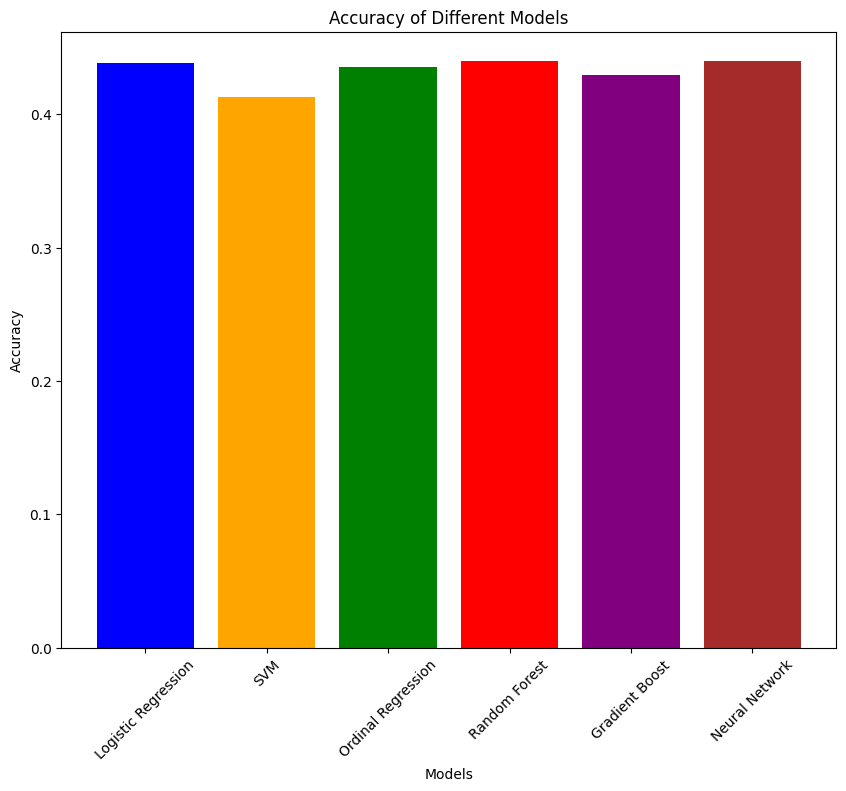

In [85]:
# Create a list of model names
models = ['Logistic Regression', 'SVM', 'Ordinal Regression', 'Random Forest','Gradient Boost', 'Neural Network']

# Define colors for the bars
colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown']


# Create a list of accuracy values
accuracy_values = [accuracy_lr, accuracy_svm, accuracy_ordinal, accuracy_rf, accuracy_gradient, accuracy_neural]

# Plot the accuracy values
plt.figure(figsize=(10, 8))
plt.bar(models, accuracy_values, color=colors)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models')


# Rotate the x-axis labels
plt.xticks(rotation=45)
plt.show()

[1.0192592592592593, 1.0992592592592592, 0.9896296296296296, 0.8287669629629629, 1.082962962962963, 0.9471206665039062]


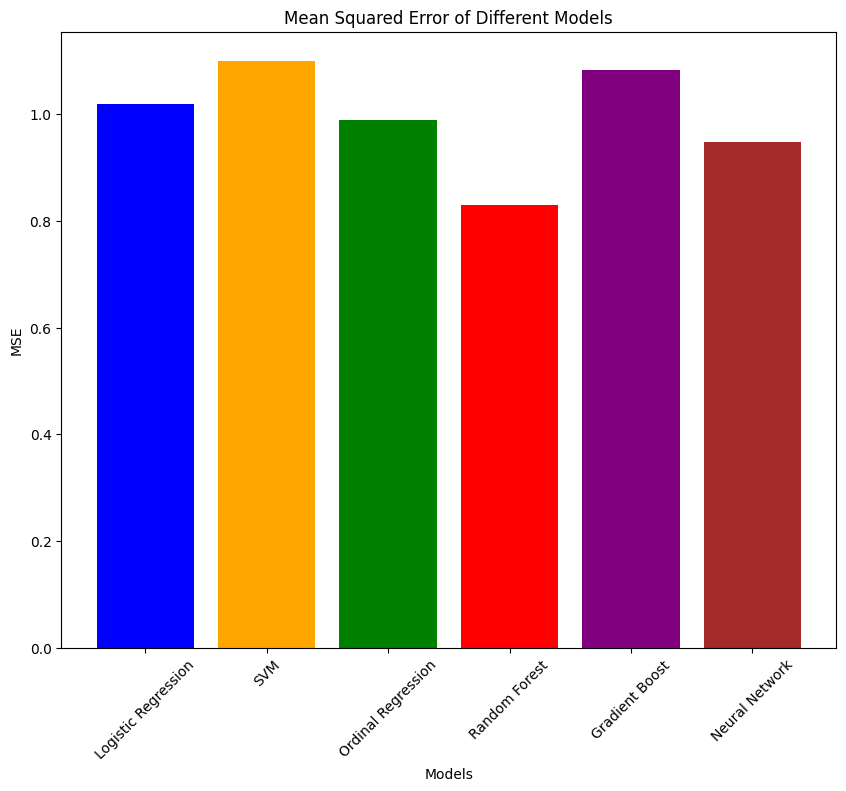

In [86]:
# Create a list of MSE values
mse_values = [mse_lr, mse_svm, mse_ordinal, mse_rf, mse_gradient, mse_neural]

print(mse_values)

# Plot the MSE values
plt.figure(figsize=(10, 8))
plt.bar(models, mse_values, color=colors )
plt.xlabel('Models')
plt.ylabel('MSE')
plt.title('Mean Squared Error of Different Models')


# Rotate the x-axis labels
plt.xticks(rotation=45)
plt.show()

### Note: Random Forest outperformed the other evaluated models. However, there is a concern about its predictions, as they are not class-specific and may include decimal values. Seeking advice on handling a multi-class ordinal target variable would be helpful. The model's accuracy remains low, suggesting the need for improvement through better feature engineering or emphasizing the use of Mean Squared Error (MSE) as an evaluation metric.

In [87]:
def plot_feature_importance(feature_names, importance_values, title):
    # Sort feature importances in descending order
    sorted_indices = np.argsort(importance_values)[::-1]
    sorted_importance = importance_values[sorted_indices]
    sorted_feature_names = [feature_names[i] for i in sorted_indices]

    # Plot the feature importances
    plt.figure(figsize=(10, 6))
    plt.barh(range(len(sorted_importance)), sorted_importance)
    plt.yticks(range(len(sorted_importance)), sorted_feature_names)
    plt.xlabel('Feature Importance')
    plt.ylabel('Feature')
    plt.title(title)
    plt.show()


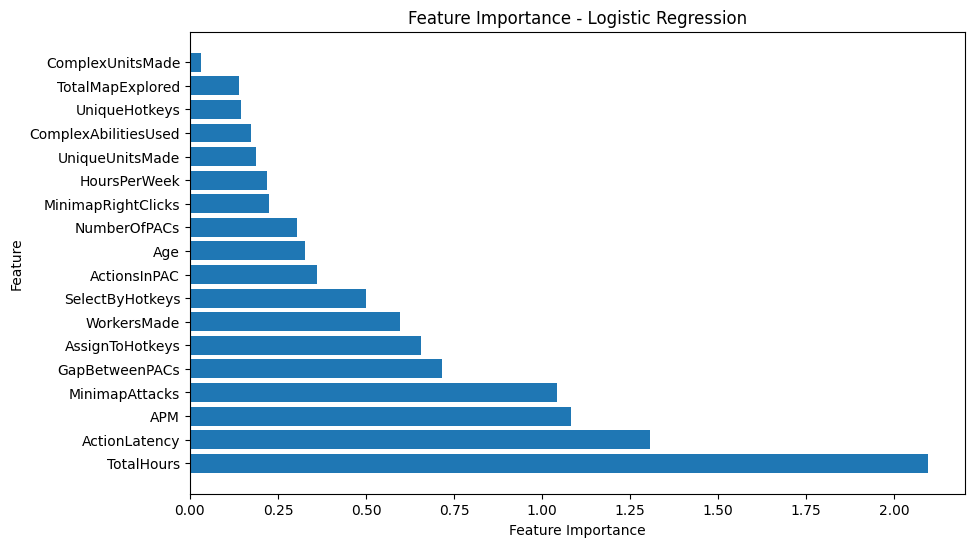

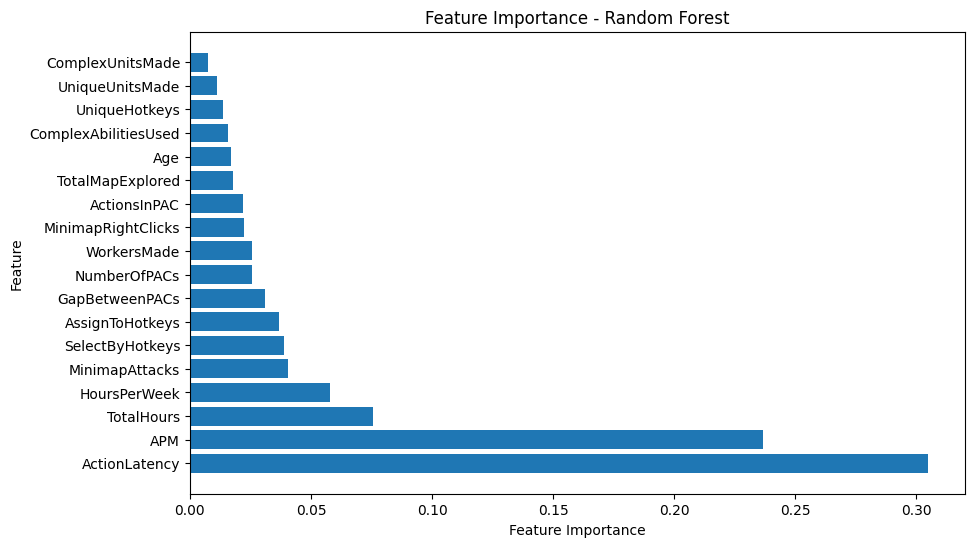

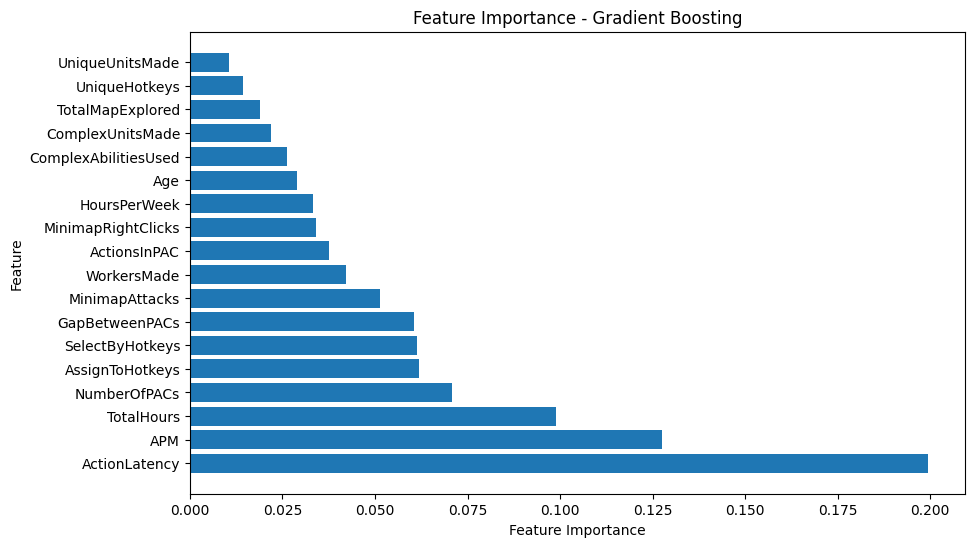

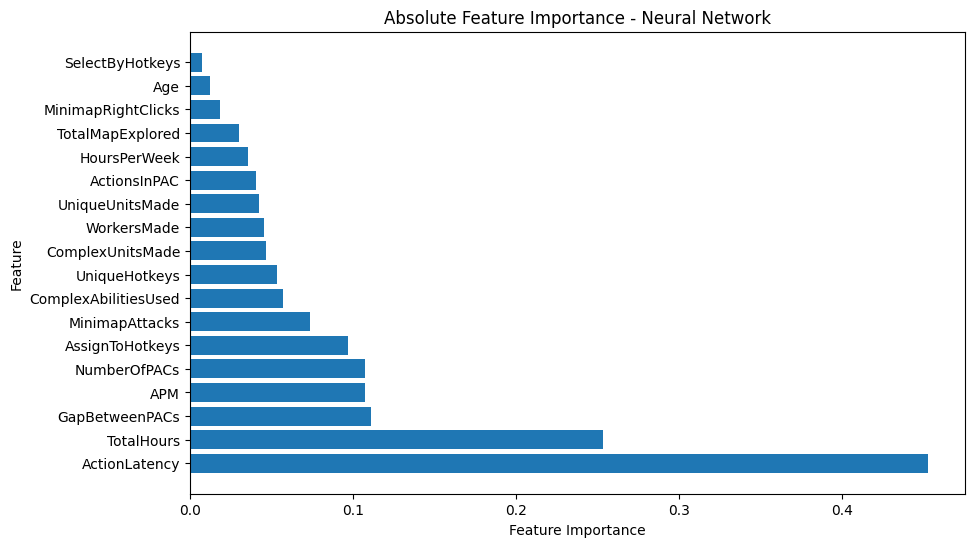

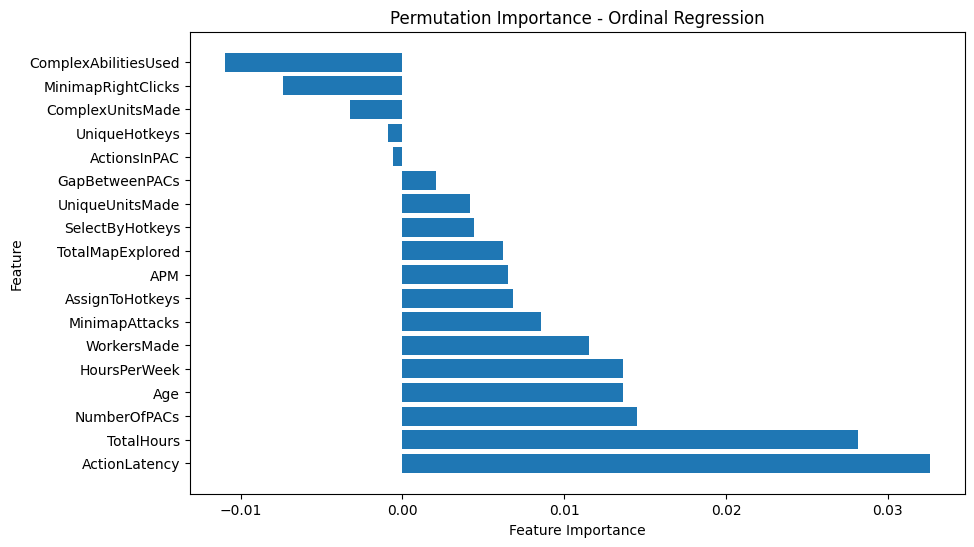

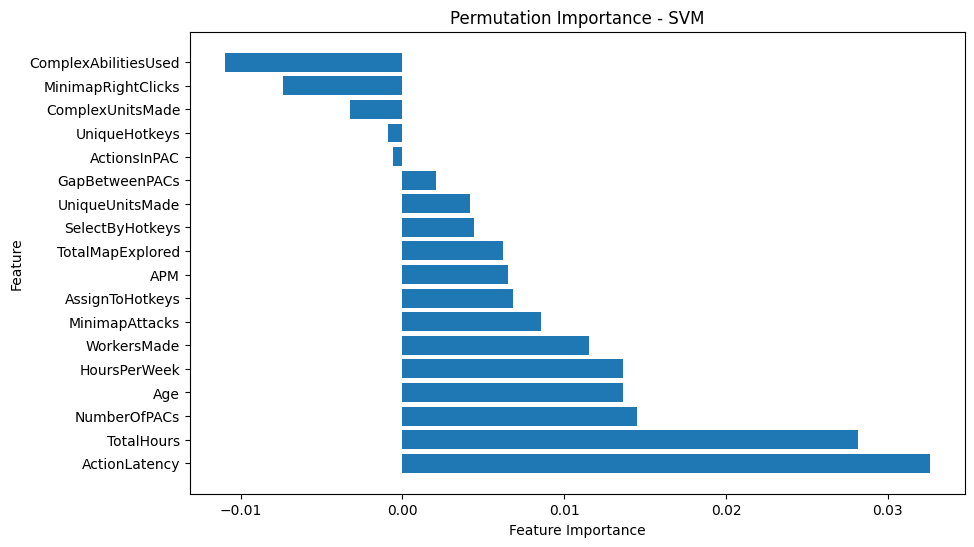

In [88]:
# Plotting Feature importances of each model
plot_feature_importance(feature_names, abs_coefficients_lr, 'Feature Importance - Logistic Regression')
plot_feature_importance(feature_names, feature_importance_rf, 'Feature Importance - Random Forest')
plot_feature_importance(feature_names, feature_importance_gradient, 'Feature Importance - Gradient Boosting')
plot_feature_importance(feature_names, feature_importance_neural, 'Absolute Feature Importance - Neural Network')
plot_feature_importance(feature_names, feature_importance_ord, 'Permutation Importance - Ordinal Regression')
plot_feature_importance(feature_names, feature_importance_svm, "Permutation Importance - SVM")

### From above graphs, Action Latency, Total hours, and APM were a majority of the models most important features. 

In [89]:
#Showing the most important features of the best model (RF)
# Sort features by importance
feature_indices = np.argsort(np.abs(feature_importance_rf))[::-1]
sorted_features = feature_names[feature_indices]
sorted_importances = feature_importance_rf[feature_indices]

# Display the top 5 most important features
top_features = sorted(zip(sorted_features[:5], sorted_importances[:5]), key=lambda x: x[1], reverse=True)
for feature, importance in top_features:
    print(f"Feature: {feature}, Importance: {importance}")

Feature: ActionLatency, Importance: 0.3048711097346496
Feature: APM, Importance: 0.23652023576414993
Feature: TotalHours, Importance: 0.07554131922189818
Feature: HoursPerWeek, Importance: 0.057973815568171376
Feature: MinimapAttacks, Importance: 0.040447873923992544


# Conclusion: 

I would like to share with you some important findings regarding the factors that contribute to a player's rank in the game. These findings will help us understand the key aspects that players should focus on in order to improve their performance.

One crucial factor is ActionLatency, which measures the delay from the start of a Player Action Cycle (PAC) to the first action. Lower ActionLatency is associated with higher ranks, so minimizing the delay is essential. Its importance score is 0.305, indicating its significance.

Another significant factor is APM (Actions Per Minute), which measures the number of actions performed per minute. Higher APM is linked to higher ranks, suggesting that making faster decisions and executing actions swiftly are important. APM has an importance score of 0.237.

TotalHours, with an importance score of 0.076, reflects the total time spent playing the game. Investing more hours enhances players' understanding and experience, contributing to higher ranks.

HoursPerWeek, with an importance score of 0.058, represents the reported weekly playtime. Consistent gameplay and allocating dedicated time each week positively impact ranks.

Lastly, SelectByHotkeys, with an importance score of 0.040, indicates the usage of hotkeys for unit and building selections. Mastering efficient hotkey usage is beneficial for achieving higher ranks.

### Based on these findings, I have some recommendations for players:

- **Most imporant**: Improve ActionLatency: Practice minimizing the time between PACs and taking the first action. Focus on faster decision-making, quicker reactions, and executing actions promptly.

- **Most imporant** Increase APM: Work on improving the number of actions performed per minute. Practice game mechanics, learn keyboard shortcuts, and enhance multitasking abilities.

- **Most imporant**: Invest sufficient time: Spend more hours playing the game to enhance overall gameplay knowledge, strategies, and skills. Consistency and regular practice are key to improvement.

- Allocate dedicated hours per week: Set aside specific hours each week dedicated to playing the game. This helps maintain consistency and allows for continuous improvement.

- Master hotkey usage: Focus on effectively utilizing hotkeys to control units and buildings. This can significantly improve gameplay speed and efficiency.

The overall theme here is to spend effective time playing, enabling quicker decision-making by processing more information during the game. By following these recommendations, players can enhance their performance and increase their ranks.

I hope you find this information valuable and can use it to support players in their journey to improve their gameplay.

### Outside research, I tried implementing this method to my models: https://towardsdatascience.com/simple-trick-to-train-an-ordinal-regression-with-any-classifier-6911183d2a3c

# EXTRA: More resource intesive model (Automated optimization)

In [90]:
# Create and train the estimator 
estimator_askl = autosklearn.regression.AutoSklearnRegressor(
    time_left_for_this_task=1800,
    seed=42, 
    resampling_strategy='cv',
    resampling_strategy_arguments={'folds': 3},
    n_jobs=2,
    metric=autosklearn.metrics.root_mean_squared_error,
)
# Auto-sklearn ingests the pandas dataframe and detects column types
estimator_askl.fit(X_train, y_train)

/home/scott/.local/lib/python3.10/site-packages/distributed/node.py:182: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 36259 instead
  warnings.warn(


[WARNING] [2023-05-27 16:35:09,611:Client-EnsembleBuilder] No runs were available to build an ensemble from
[WARNING] [2023-05-27 16:35:10,098:Client-EnsembleBuilder] No runs were available to build an ensemble from


AutoSklearnRegressor(ensemble_class=<class 'autosklearn.ensembles.ensemble_selection.EnsembleSelection'>,
                     metric=root_mean_squared_error, n_jobs=2,
                     per_run_time_limit=360, resampling_strategy='cv',
                     resampling_strategy_arguments={'folds': 3}, seed=42,
                     time_left_for_this_task=1800)

In [91]:
# Score the model
prediction = estimator_askl.predict(X_test)

import sklearn.metrics
performance_askl = sklearn.metrics.mean_squared_error(y_test, prediction, squared=False)
print(f"Auto-Sklearn Classifier MSE performance is {performance_askl}")

# Predict the target variable for the new data
predictions = estimator_askl.predict(new_data)

# Print the predictions
print("Predictions:", predictions)

Auto-Sklearn Classifier MSE performance is 0.8788008067527734


/home/scott/.local/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but SimpleImputer was fitted without feature names
  warnings.warn(
/home/scott/.local/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but SimpleImputer was fitted without feature names
  warnings.warn(
/home/scott/.local/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but SimpleImputer was fitted without feature names
  warnings.warn(
/home/scott/.local/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but SimpleImputer was fitted without feature names
  warnings.warn(
/home/scott/.local/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but SimpleImputer was fitted without feature names
  warnings.warn(
/home/scott/.local/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but SimpleImputer was fitted without featu

Predictions: [3.66554303]


/home/scott/.local/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but SimpleImputer was fitted without feature names
  warnings.warn(
/home/scott/.local/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but SimpleImputer was fitted without feature names
  warnings.warn(
/home/scott/.local/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but SimpleImputer was fitted without feature names
  warnings.warn(
/home/scott/.local/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but SimpleImputer was fitted without feature names
  warnings.warn(
/home/scott/.local/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but SimpleImputer was fitted without feature names
  warnings.warn(
/home/scott/.local/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but SimpleImputer was fitted without featu

# 2nd best performing model but gives a decimal prediction like RF

In [92]:
# Calculate permutation feature importance
result = permutation_importance(estimator_askl, X_test, y_test, n_repeats=10, random_state=42)
feature_importances = np.abs(result.importances_mean)

# Print the feature importance values
for feature_name, importance in zip(feature_names, feature_importances):
    print(f'{feature_name}: {importance}')

Age: 0.006063236470254818
HoursPerWeek: 0.015726503987869365
TotalHours: 0.14260079337510803
APM: 0.03129305549025178
SelectByHotkeys: 0.02388588333845134
AssignToHotkeys: 0.022275728483531286
UniqueHotkeys: 0.005131960041999284
MinimapAttacks: 0.03736379117019971
MinimapRightClicks: 0.001756567407960452
NumberOfPACs: 0.004240755979317734
GapBetweenPACs: 0.015314957674194685
ActionLatency: 0.1476855064129076
ActionsInPAC: 0.004081996835185153
TotalMapExplored: 0.013243488477846987
WorkersMade: 0.012056442814543822
UniqueUnitsMade: 0.0034705115629258933
ComplexUnitsMade: 0.00013299570156667385
ComplexAbilitiesUsed: 0.0044368512207812235


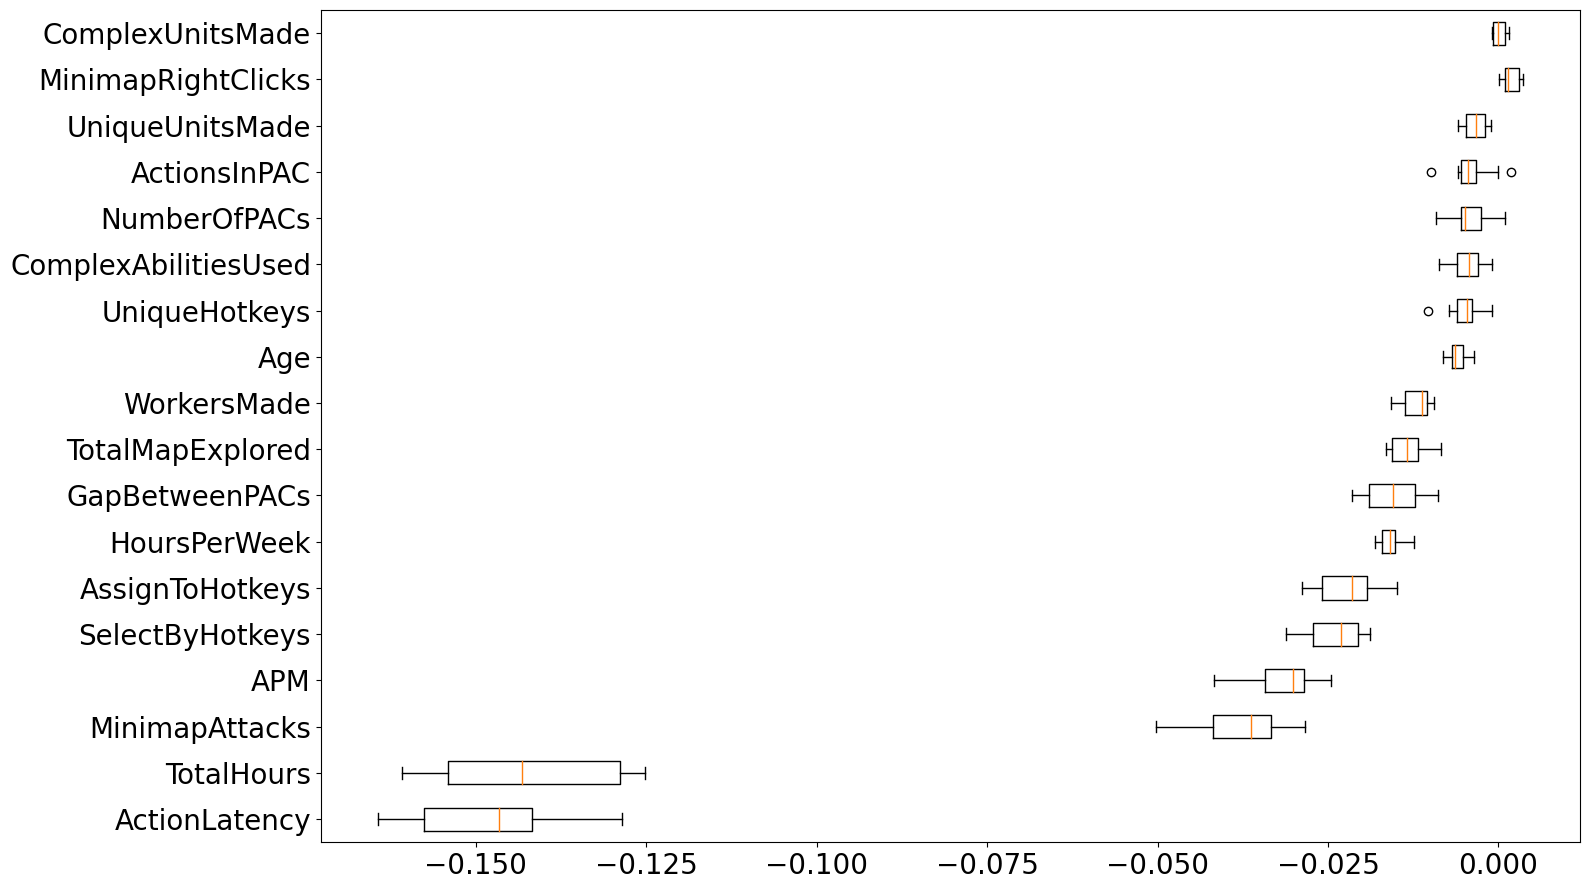

In [93]:
# Create the boxplot
fig = plt.figure(figsize=(16, 9))
ax = fig.add_subplot(111)
sort_idx = feature_importances.argsort()[::-1]  # Sort indices in descending order
ax.boxplot(result.importances[sort_idx].T, labels=[feature_names[i] for i in sort_idx], vert=False)

# Set font size
for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_fontsize(20)

# Adjust the layout
fig.tight_layout()

# Show the plot
plt.show()

Alligns with the other models but not in abs value